In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.optimize import newton
#this file contains the moment functions made in Chapter 3
import Moment_Function as mf
%matplotlib inline

# Generation of a Graph Directed IFS

This is a function to generate the IFS for a Generalised Sierpinski Triangle

In [2]:
def GSP(a = 1.1, b = 0.85, par = 'FFF', imgxy = 480, it = 50000, IFS = False):
    
    #co ordinates of triangles third vertex
    Cy=(float)(0.5*np.sqrt(-1 + 2*a**2 - a**4 + 2*b**2 + 2*a**2*b**2 - b**4))
    Cx=(float)(0.5*(1 - a**2 + b**2))

    #angles for roatation
    cosA=(float)(Cx/b)
    sinA=(float)(Cy/b)
    cosB=(float)((1.0-Cx)/a)
    sinB=(float)(Cy/a)
    
    #view box
    xa = min(-0.2,Cx-0.2)
    xb = max(1.2,Cx+0.2)
    ya =-0.2
    yb = max(1.2,Cy+0.2)
    
    #starting values
    x=0.0
    y=0.0
    
    #image 
    image = Image.new("RGB", (imgxy, imgxy),"white")

    if par == 'FFF':
        
        alphaFFF=(float)(-(-1 + a**2 - b**2))/(float)(2*b)
        betaFFF=(float)(-(-1 - a**2 + b**2))/(float)(2*a)
        gammaFFF=(float)(-(1 - a**2 - b**2))/(float)(2*a*b)
        
        detaFFF=alphaFFF*alphaFFF
        detbFFF=betaFFF*betaFFF
        detgFFF=gammaFFF*gammaFFF
        pnormFFF=(detaFFF+detbFFF+detgFFF)
        paFFF=(float)(detaFFF)/(float)(pnormFFF)
        pbFFF=(float)(detbFFF)/(float)(pnormFFF)
        pgFFF=(float)(detgFFF)/(float)(pnormFFF)
        
        FFF=[[cosA*alphaFFF,sinA*alphaFFF,sinA*alphaFFF,-cosA*alphaFFF,0.0,0.0,paFFF],[betaFFF*cosB,-betaFFF*sinB,-betaFFF*sinB,-betaFFF*cosB,1.0-betaFFF*cosB,sinB*betaFFF,pbFFF],[-(gammaFFF*(cosA*cosB + sinA*sinB)),gammaFFF*(-(cosB*sinA) + cosA*sinB),-(gammaFFF*(cosB*sinA - cosA*sinB)),gammaFFF*(cosA*cosB + sinA*sinB),1.0-betaFFF*cosB,betaFFF*sinB,pgFFF]]

        mat=FFF
        
        def f(d) : 
            return [alphaFFF**d[0]+betaFFF**d[0]+gammaFFF**d[0]-1]
        
        alpha = alphaFFF
        
    if par == 'FFN':
        
        alphaNFF=(float)(b)/float((a**2 + b**2))
        betaNFF=(float)(a)/(float)(a**2 + b**2)
        gammaNFF=-1.0*(float)(1.0-a**2-b**2)/(float)(a**2 + b**2)
        
        detaNFF=alphaNFF*alphaNFF
        detbNFF=betaNFF*betaNFF
        detgNFF=gammaNFF*gammaNFF
        pnormNFF=(detaNFF+detbNFF+detgNFF)
        paNFF=(float)(detaNFF)/(float)(pnormNFF)
        pbNFF=(float)(detbNFF)/(float)(pnormNFF)
        pgNFF=(float)(detgNFF)/(float)(pnormNFF)
        
        NFF=[[cosA*alphaNFF,sinA*alphaNFF,sinA*alphaNFF,-cosA*alphaNFF,0.0,0.0,paNFF],[betaNFF*cosB,-betaNFF*sinB,-betaNFF*sinB,-betaNFF*cosB,1.0-betaNFF*cosB,sinB*betaNFF,pbNFF],[gammaNFF,0.0,0.0,gammaNFF,(1.0-gammaNFF)*Cx,(1.0-gammaNFF)*Cy,pgNFF]]
        
        mat=NFF
        
        def f(d) : 
            return [alphaNFF**d[0]+betaNFF**d[0]+gammaNFF**d[0]-1]
        
        alpha = alphaFFN
        
    if par == 'FNN':
        
        alphaNNF=(float)(b/(1.0 + b**2))
        betaNNF=(float)(1.0/(1.0 + b**2))
        gammaNNF=(float)(b**2/(1.0 + b**2))
 
        
        detaNNF=alphaNNF*alphaNNF
        detbNNF=betaNNF*betaNNF
        detgNNF=gammaNNF*gammaNNF
        pnormNNF=(detaNNF+detbNNF+detgNNF)
        paNNF=(float)(detaNNF)/(float)(pnormNNF)
        pbNNF=(float)(detbNNF)/(float)(pnormNNF)
        pgNNF=(float)(detgNNF)/(float)(pnormNNF)
        
        NNF=[[cosA*alphaNNF,sinA*alphaNNF,sinA*alphaNNF,-cosA*alphaNNF,0.0,0.0,paNNF],[betaNNF,0.0,0.0,betaNNF,(1.0-betaNNF),0,pbNNF],[gammaNNF,0.0,0.0,gammaNNF,(1.0-gammaNNF)*Cx,(1.0-gammaNNF)*Cy,pgNNF]]

        mat=NNF 
        
        def f(d) : 
            return [alphaNNF**d[0]+betaNNF**d[0]+gammaNNF**d[0]-1] 
        
        alpha = alphaNNF
        
    if par == 'NNN':
        NNN=[[0.5,0.0,0.0,0.5,0.0,0.0,1/3],[0.5,0.0,0.0,0.5,0.5,0,1/3],[0.5,0.0,0.0,0.5,0.5*Cx,0.5*Cy,1/3]]
    
        mat=NNN 
        
        def f(d) : 
            return [(0.5)**d[0]+(0.5)**d[0]+(0.5)**d[0]-1] 
        
        alpha = 1/2
        

    for k in range(it):

        p=random.random() 
        if p <= mat[0][6]:
            i=0
        elif p <= mat[0][6] + mat[1][6]:
            i=1
        else:
            i=2

        x0 = x * mat[i][0] + y * mat[i][1] + mat[i][4] 
        y  = x * mat[i][2] + y * mat[i][3] + mat[i][5] 
        x = x0 
        jx = int((x - xa) / (xb - xa) * (imgxy - 1)) 
        jy = (imgxy - 1) - int((y - ya) / (yb - ya) * (imgxy - 1))

        if i==2:
             image.putpixel((jx, jy), (255,0,0,255))
        elif i==1: 
             image.putpixel((jx, jy), (255,255,0,255))
        elif i==0:
             image.putpixel((jx, jy), (0,0,255,255))
                
    if IFS:
        
        return image, mat ,alpha
    
    return image

    

Make a Pedal triangle (FFF)

In [3]:
img_p, IFS_p, alpha_p = GSP(par = 'FFF', IFS = True)
print(IFS_p)
print(alpha_p)

[[0.09088451557093417, 0.28744481279085693, 0.28744481279085693, -0.09088451557093417, 0.0, 0.0, 0.11407480752424524], [0.45716038223140504, -0.4981613866503913, -0.4981613866503913, -0.45716038223140504, 0.542839617768595, 0.4981613866503913, 0.5738104261562041], [-0.4519551021976607, -0.21071657385953432, -0.21071657385953432, 0.4519551021976607, 0.542839617768595, 0.4981613866503913, 0.3121147663195507]]
0.301470588235294


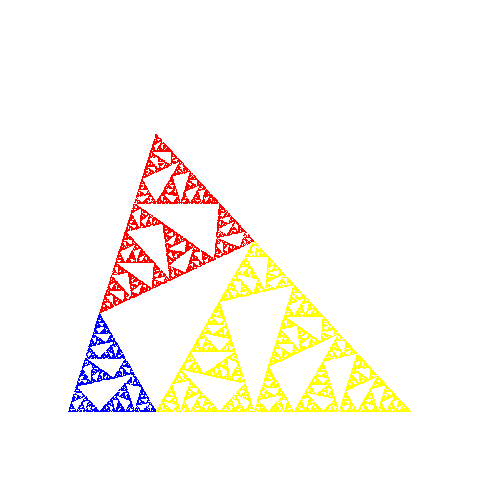

In [4]:
img_p

Make a Steemson triangle (FNN) with the same side lengths as above

In [5]:
img_s, IFS_s,alpha_s = GSP(par = 'FNN', IFS = True,it = 1000000)
print(IFS_s)
print(alpha_s)

[[0.14876632801161097, 0.4705103948263383, 0.4705103948263383, -0.14876632801161097, 0.0, 0.0, 0.3218970764728323], [0.5805515239477503, 0.0, 0.0, 0.5805515239477503, 0.41944847605224966, 0, 0.44553228577554643], [0.4194484760522496, 0.0, 0.0, 0.4194484760522496, 0.14876632801161094, 0.4705103948263383, 0.23257063775162132]]
0.4934687953555878


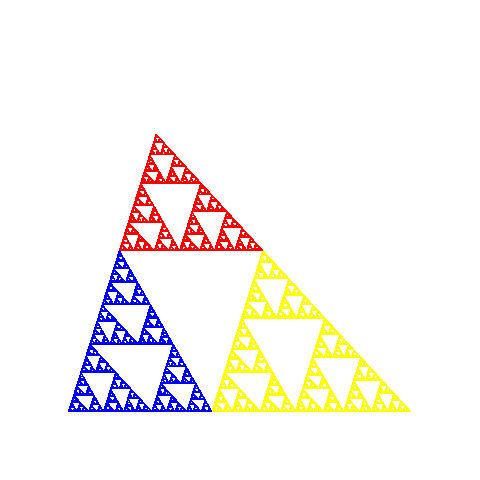

In [6]:
img_s

Create a graph directed system by combining these two

In [7]:
f1 = np.hstack(((alpha_s/alpha_p)*np.array([IFS_p[0][:2] , IFS_p[0][2:4]]), np.array([[IFS_p[0][4]],[IFS_p[0][5]]]) ) ) 
f2 = np.array([IFS_s[1][:2] + [IFS_s[1][4]], IFS_s[1][2:4] + [IFS_s[1][5]] ])
f3 = np.array([IFS_s[2][:2] + [IFS_s[2][4]], IFS_s[2][2:4] + [IFS_s[2][5]] ])

g1 = np.hstack(((alpha_p/alpha_s)*np.array([IFS_s[0][:2] , IFS_s[0][2:4]]), np.array([[IFS_s[0][4]],[IFS_s[0][5]]]) ) )
g2 = np.array([IFS_p[1][:2] + [IFS_p[1][4]], IFS_p[1][2:4] + [IFS_p[1][5]] ])
g3 = np.array([IFS_p[2][:2] + [IFS_p[2][4]], IFS_p[2][2:4] + [IFS_p[2][5]] ])

lam_f1 = np.sqrt(abs(np.linalg.det(f1[:,:2])))
lam_f2 = np.sqrt(abs(np.linalg.det(f2[:,:2])))
lam_f3 = np.sqrt(abs(np.linalg.det(f3[:,:2])))

lam_g1 = np.sqrt(abs(np.linalg.det(g1[:,:2])))
lam_g2 = np.sqrt(abs(np.linalg.det(g2[:,:2])))
lam_g3 = np.sqrt(abs(np.linalg.det(g3[:,:2])))

f_dim = lambda D : lam_f1**D + lam_f2**D + lam_f3**D - 1

f_D = newton(f_dim, 1.5)

g_dim = lambda D : lam_g1**D + lam_g2**D + lam_g3**D - 1

g_D = newton(g_dim, 1.5)

pf1 = lam_f1**f_D
pf2 = lam_f2**f_D
pf3 = lam_f3**f_D

pg1 = lam_g1**g_D
pg2 = lam_g2**g_D
pg3 = lam_g3**g_D

Check that the dimension equation is correct.

In [8]:
print(pf1+pf2+pf3)
print(pg1+pg2+pg3)

1.0
1.0


In [9]:
F = [f1,f2,f3]
G = [g1,g2,g3]

The graph for this system can be coded as a row stochastic matrix

In [10]:
P = np.array([[0,pf2,pf3,pf1,0,0],\
              [0,pf2,pf3,pf1,0,0],\
              [0,pf2,pf3,pf1,0,0],\
              [pg1,0,0,0,pg2,pg3],\
              [pg1,0,0,0,pg2,pg3],\
              [pg1,0,0,0,pg2,pg3],\
             ])

Make a version of the chaos game with place dependent probabilities

In [11]:
def GraphIFS(F ,G ,P ,x0 = np.array([0,0]), it = 100000, imgxy=500, xa = -0.05, xb = 1.05, ya = -0.05, yb = 1.05 ):
    
    F_img = Image.new("RGB", (imgxy, imgxy),"white")
    G_img = Image.new("RGB", (imgxy, imgxy),"white")
    nf = len(F)
    ng = len(G)
    
    A = F[0][0:2,0:2]
    b = F[0][:,2]
    
    x = A @ x0 + b
    
    X1 = []
    X2 = []
    
    j = 0
    
    for i in range(it):
        
        p = P[j,:]
        j_old = j 
        j = np.random.choice(nf+ng, p=p)
        
        if (j < nf):
            A = F[j][0:2,0:2]
            b = F[j][:,2]
            x = A @ x + b
            jx = int((x[0] - xa) / (xb - xa) * (imgxy - 1)) 
            jy = (imgxy - 1) - int((x[1] - ya) / (yb - ya) * (imgxy - 1))
            if (j_old < nf):
                F_img.putpixel((jx, jy), (255,0,0,255))
            else:
                F_img.putpixel((jx, jy), (0,0,255,255))
                
            X1.append(x)
        
        else:
            k = j - nf
            A = G[k][0:2,0:2]
            b = G[k][:,2]
            x = A @ x + b
            jx = int((x[0] - xa) / (xb - xa) * (imgxy - 1)) 
            jy = (imgxy - 1) - int((x[1] - ya) / (yb - ya) * (imgxy - 1))
            if (j_old < nf):
                G_img.putpixel((jx, jy), (255,0,0,255))
            else:
                G_img.putpixel((jx, jy), (0,0,255,255))  
                
            X2.append(x)
                
    return F_img, G_img, np.array(X1), np.array(X2)

In [12]:
F_img, G_img, A1, A2 = GraphIFS(F ,G ,P,it = 50000 ,imgxy = 500)

Make an image of the two metric spaces and their respective attractors 

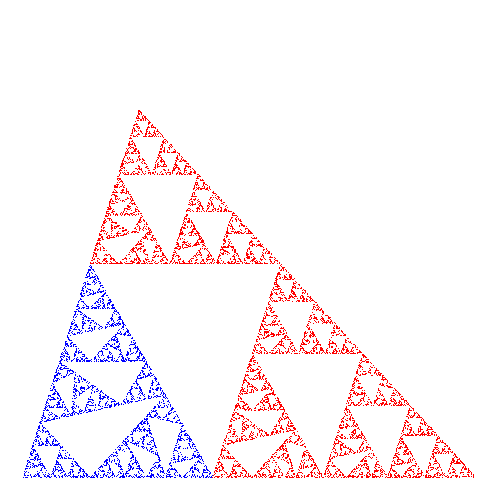

In [13]:
F_img

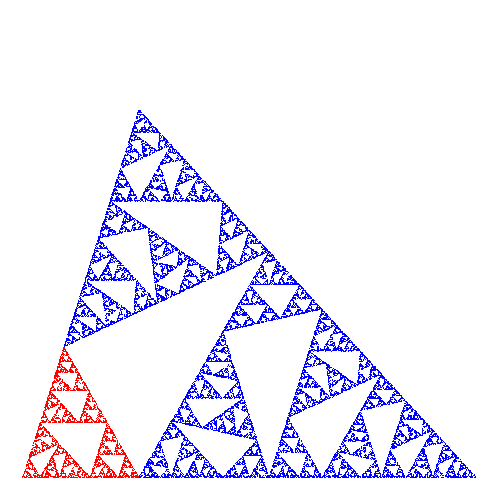

In [14]:
G_img

# Moment Calculations

We aim to simply calculate the moments of the above vectorised system. There is a clear way to impliment this generally, we only present the outline to how this is done.

In [15]:
#number of moments
n = 6

#create stacked moment vector
M1 = np.zeros((n,1))
M1[0] = 1
M2 = np.zeros((n,1))
M2[0] = 1
M = np.vstack((M1,M2))

In [16]:
M.T

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [17]:
def A(f,n=n):
    
    a_l,b_l,c_l,d_l,e_l,f_l = np.hstack((f[:2,:2].flatten(),f[:,2].flatten()))
    
    return mf.A_r(a_l,b_l,c_l,d_l,e_l,f_l,N = n)

Get probabilites

In [18]:
p_1_1 = P[0,:3]
p_1_2 = P[0,3:]
p_2_1 = P[3,:3]
p_2_2 = P[3,3:]

Define the individual moment matrices

In [19]:
Phi_1_1 = p_1_1[0]*A(g1) + p_1_1[1]*A(f2) + p_1_1[2]*A(f3)
Phi_1_2 = p_1_2[0]*A(f1) + p_1_2[1]*A(g2) + p_1_2[2]*A(g3)
Phi_2_1 = p_2_1[0]*A(g1) + p_2_1[1]*A(f2) + p_2_1[2]*A(f3)
Phi_2_2 = p_2_2[0]*A(f1) + p_2_2[1]*A(g2) + p_2_2[2]*A(g3)

In [20]:
Phi_1 = np.hstack((Phi_1_1,Phi_1_2 ))
Phi_2 = np.hstack((Phi_2_1,Phi_2_2 ))

Define the overall moment operator

In [21]:
Phi = np.vstack((Phi_1,Phi_2))

Check iterative formula

In [22]:
Mom = np.linalg.matrix_power(Phi,20)@M

Check with Eltons Theorem to see that our iterative formula works.

In [23]:
print(mf.elt(A1,size = n))
print(Mom[:n].flatten())

[1.         0.42700472 0.26243938 0.24228712 0.09667855 0.11652503]
[1.         0.42654595 0.26458401 0.24100212 0.09792307 0.11796502]


In [24]:
print(mf.elt(A2,size = n))
print(Mom[n:].flatten())

[1.         0.43306497 0.27073038 0.24496596 0.10231689 0.12116946]
[1.         0.43267849 0.27051691 0.24464886 0.10215002 0.12083241]
